# Visualisation en barplot des compétences numériques clés de l'archiviste

Ce notebook contient le code utilisé pour générer la visualisation sous forme de barplot des compétences numériques clés dans les institutions cantonales d'archives. Toutes les versions du code sont conservées dans ce notebook. La visualisation est disponible contextualisé dans le rapport de l'étude.

  Quelles sont d'après vous les compétences numériques les plus utiles en archives aujourd'hui ?
0                             Archivage électronique                                            
1          Reconnaissance automatique des manuscrits                                            
2                   Edition/publication électronique                                            
3                            Gestion des métadonnées                                            
4    Transcriptions et traductions de textes anciens                                            


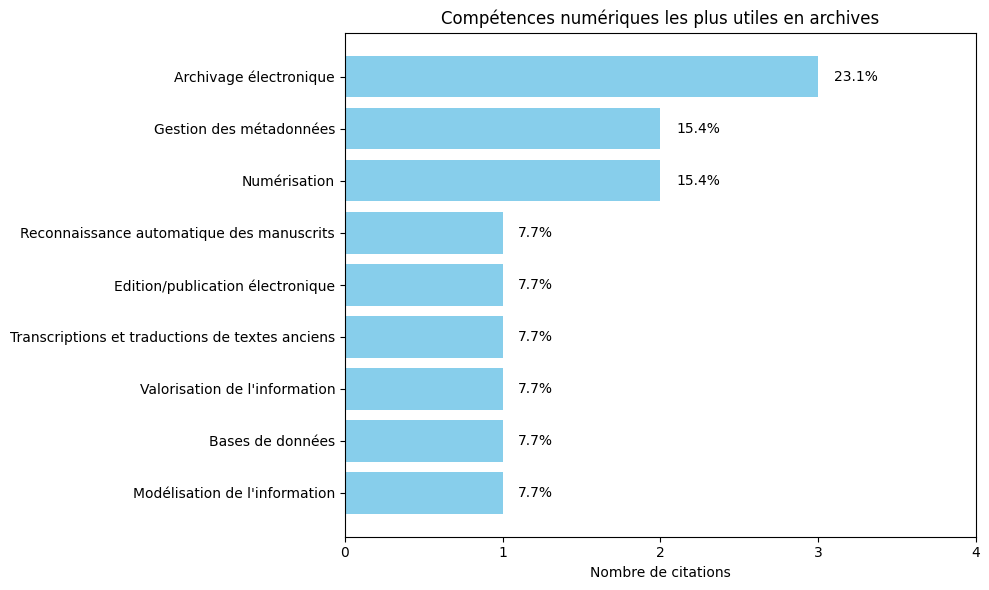

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Charger le fichier Excel (assure-toi qu'il est dans le même dossier que ton script ou notebook)
df = pd.read_excel("Compétences_numériques.xlsx")

# Afficher les premières lignes pour vérifier
print(df.head())

# Vérifier le nom exact de la colonne contenant les compétences (par exemple "Titre")
colonne_competence = "Quelles sont d'après vous les compétences numériques les plus utiles en archives aujourd'hui ?"

# Compter les occurrences
counts = df[colonne_competence].value_counts().reset_index()
counts.columns = ["Compétence", "Occurrences"]
counts["Pourcentage"] = (counts["Occurrences"] / counts["Occurrences"].sum()) * 100

# Tracer le barplot horizontal
plt.figure(figsize=(10, 6))
bars = plt.barh(counts["Compétence"], counts["Occurrences"], color='skyblue')

# Ajouter les pourcentages à droite de chaque barre
for bar, pct in zip(bars, counts["Pourcentage"]):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
             f"{pct:.1f}%", va='center')

plt.xlabel("Nombre de citations")
plt.title("Compétences numériques les plus utiles en archives")
plt.xlim(0, 4)  # Limites fixes
plt.xticks(range(0, 5, 1))  # Graduation entière : 0, 1, 2, 3, 4
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))  # Force le pas de 1
plt.gca().invert_yaxis()  # la compétence la plus citée en haut
plt.tight_layout()
plt.show()


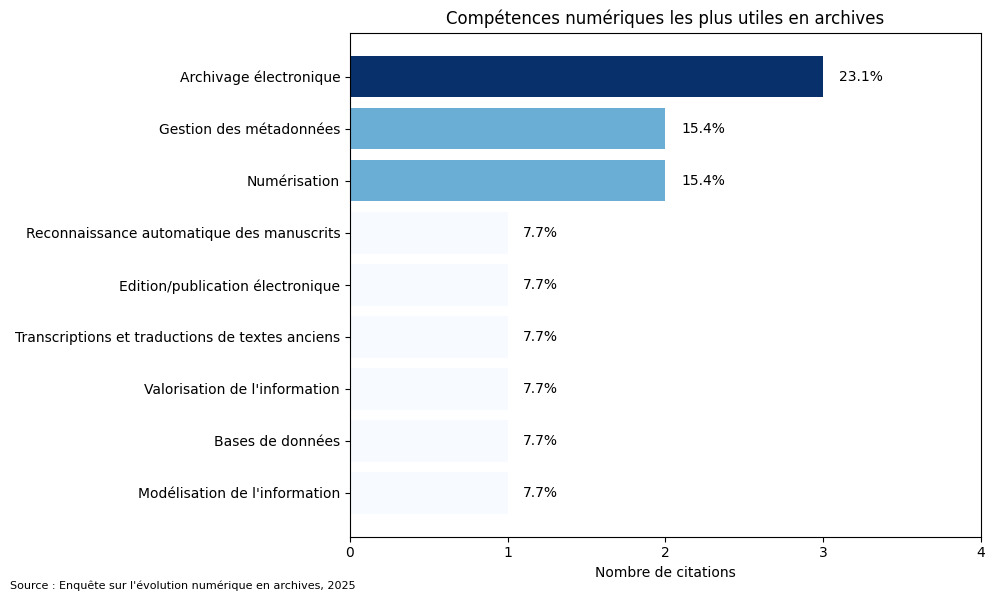

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import numpy as np

# Charger le fichier Excel
df = pd.read_excel("Compétences_numériques.xlsx")

# Nom de la colonne des compétences
colonne_competence = "Quelles sont d'après vous les compétences numériques les plus utiles en archives aujourd'hui ?"

# Nettoyage et comptage
counts = df[colonne_competence].dropna().value_counts().reset_index()
counts.columns = ["Compétence", "Occurrences"]
counts["Pourcentage"] = (counts["Occurrences"] / counts["Occurrences"].sum()) * 100

# Palette de bleu du plus foncé (valeurs hautes) au plus clair (valeurs basses)
norm = plt.Normalize(counts["Occurrences"].min(), counts["Occurrences"].max())
colors = cm.Blues(norm(counts["Occurrences"]))

# Tracer le barplot horizontal
plt.figure(figsize=(10, 6))
bars = plt.barh(counts["Compétence"], counts["Occurrences"], color=colors)

# Ajouter les pourcentages à droite de chaque barre
for bar, pct in zip(bars, counts["Pourcentage"]):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
             f"{pct:.1f}%", va='center')

# Configuration de l'axe X
plt.xlabel("Nombre de citations")
plt.title("Compétences numériques les plus utiles en archives")
plt.figtext(0.01, 0.01, "Source : Enquête sur l'évolution numérique en archives, 2025", ha="left", fontsize=8)
plt.xlim(0, 4)
plt.xticks(range(0, 5, 1))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
